## Tweet Sentiment Classification

In [ ]:
!pip install fsspec==2025.3.2


In [ ]:
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.0 MB/s eta 0:00:00
   ━━━

In [ ]:
from datasets import load_dataset
dataset = load_dataset("tweet_eval", "sentiment")["train"]
texts = dataset["text"]
sentiments = dataset["label"]

#Map sentiment labels for clarity
sentiment_labels = ["negative","neutral","positive"]
titles = [sentiment_labels[label] for label in sentiments]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
!pip install --upgrade datasets


In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(texts, show_progress_bar=True)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1426 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(45615, 384)

In [ ]:
from umap import UMAP
#we reduced the input embeddings from 384 dimensions to 5 dimensions
umap_model = UMAP(n_components=5,min_dist=0.0,metric='cosine',random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size = 50, metric = 'euclidean', cluster_selection_method = 'eom').fit(reduced_embeddings)
clusters= hdbscan_model.labels_
len(set(clusters))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


178

In [ ]:
import numpy as np
cluster = 10
for index in np.where(clusters==cluster)[0][:3]:
  print (texts[index][:300]+"... \n")

"J'regarde des infos sur Ragnarok (le film) &amp;bon: ""Thor will make it out of the third movie[..]Loki, on the other hand may not be so Lucky."""... 

#RT The 3rd book in The Viking's Apprentice series has been released. Amazon users get it here #amreading... 

I want Skye to be the love of May and Thor... 



In [ ]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Static Plot

(np.float64(-10.556870031356812),
 np.float64(14.855716276168824),
 np.float64(-4.204183053970337),
 np.float64(21.95045132637024))

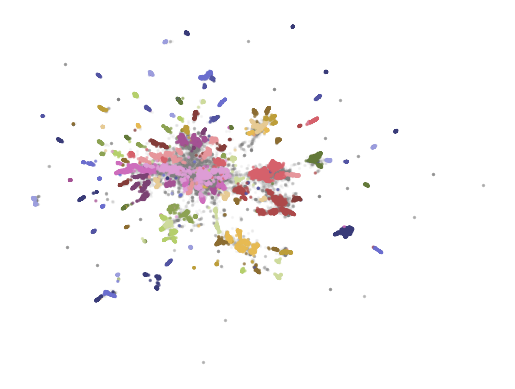

In [ ]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')
# plt.savefig("matplotlib.png", dpi=300)  # Uncomment to save the graph as a .png

## **BERTopic: A Modular Topic Modeling Framework**

In [ ]:
from bertopic import BERTopic

# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(texts, embeddings)

2025-06-21 16:39:19,973 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-21 16:40:34,240 - BERTopic - Dimensionality - Completed ✓
2025-06-21 16:40:34,242 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-21 16:40:40,033 - BERTopic - Cluster - Completed ✓
2025-06-21 16:40:40,056 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-21 16:40:40,986 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14748,-1_u002c_user_u2019s_at,"[u002c, user, u2019s, at, to, the, on, in, for...",[@user was at home and @user was on the road s...
1,0,1136,0_cena_raw_rollins_seth,"[cena, raw, rollins, seth, lesnar, brock, wwe,...",[Who's ready for WWE SummerSlam this Sunday!! ...
2,1,812,1_game_state_lsu_saturday,"[game, state, lsu, saturday, bowl, ole, vs, ba...",[who ever wins LSU vs Bama this saturday is go...
3,2,592,2_arsenal_everton_chelsea_league,"[arsenal, everton, chelsea, league, united, ga...",[Does anyone know how silver/red Arsenal membe...
4,3,566,3_sox_red_white_yankees,"[sox, red, white, yankees, royals, inning, mar...","[""White Sox take the lead, Mariners 0, White S..."
...,...,...,...,...,...
173,172,58,172_valentine_valentines_february_day,"[valentine, valentines, february, day, happy, ...",[Happy Valentine\u2019s Day is trending? ?? Bu...
174,173,57,173_school_enrole_sats_ill,"[school, enrole, sats, ill, user, math, test, ...",[@user Yeah and the course is full now! I have...
175,174,54,174_harper_elxn42_cdnpoli_cpc,"[harper, elxn42, cdnpoli, cpc, trudeau, mulcai...",[Oct 19: Election day; also Harper's last day ...
176,175,53,175_jupiter_astrology_venus_granite,"[jupiter, astrology, venus, granite, sun, moon...",[Just then\u002c the day broke and the facade ...


In [ ]:
topic_model.get_topic(12)

[('nirvana', np.float64(0.11623451596533113)),
 ('kurt', np.float64(0.06598691125058144)),
 ('cobain', np.float64(0.06578229607202545)),
 ('solo', np.float64(0.013653491800334235)),
 ('1993', np.float64(0.01096659812205131)),
 ('album', np.float64(0.010255576421651456)),
 ('1967', np.float64(0.009426288427292293)),
 ('smells', np.float64(0.009026217737396001)),
 ('listening', np.float64(0.009017708624022205)),
 ('sun', np.float64(0.00877723282133882))]

In [ ]:
#topic_model.topics_[titles.index('BERTopic: Neural topic modeling with a class-based TF-IDF procedure')]

In [ ]:
# Visualize barchart with ranked keywords
topic_model.visualize_barchart()

# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=30)

# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

In [ ]:
# Visualize topics and documents
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))